# <div style="text-align:center">서울시 지역별 1인 가구 수와 범죄 발생의 상관관계

<div style="text-align: right"> <br>201902024 글로벌경영학부 김윤수
<br>202004182 ICT공학부 강혜지

## 목차
1. 주제 선정 이유
2. 데이터 설명
    <br>1) 1인가구 데이터 전처리
    <br>2) 범죄 발생 데이터 전처리
    <br>3) 주요시설 데이터 전처리
    <br>4) 각 데이터 시각화로 살펴보기
3. 데이터 분석
4. 결론
5. 한계점

### 1. 주제 선정 이유

<br>1인 가구의 수가 증가할 수록 경제적 압박이나 사회적 고립등의 이유로 범죄 발생률이 증가할 수 있다.
<br>또한, 치안 시설이 범죄 예방에 어떤 영향을 미치는지 파악하여 이를 통해 정부나 관련 기관에 치안 시설 확충 등의 제안을 할 수 있다.

In [37]:
import pandas as pd
import numpy as np

### 2. 데이터 설명

[서울 열린 데이터 광장] : (https://data.seoul.go.kr/)
<br>1인가구(거처종류별), 5대 범죄 발생현황, 시내주요기관(경찰서, 소방서 등) 데이터 다운로드

#### 1) 1인가구 데이터 전처리

In [38]:
#1인가구 데이터 불러오기

import chardet
with open('1인가구(거처종류별).csv', 'rb') as f:
    result = chardet.detect(f.read())
encoding = result['encoding']
house = pd.read_csv('1인가구(거처종류별).csv', encoding=encoding)

house

,자치구별(1),자치구별(2),소계,소계.1,소계.2,소계.3,소계.4,소계.5,단독주택,단독주택.1,...,연립주택.2,다세대주택,다세대주택.1,다세대주택.2,비거주용 건물내 주택,비거주용 건물내 주택.1,비거주용 건물내 주택.2,소계.6,소계.7,소계.8
0,자치구별(1),자치구별(2),계,남자,여자,계,남자,여자,계,남자,...,여자,계,남자,여자,계,남자,여자,계,남자,여자
1,합계,소계,1489893,698324,791569,1240505,574089,666416,547251,283223,...,13621,275351,122190,153161,47408,26542,20866,249388,124235,125153
2,합계,종로구,27308,13211,14097,21465,10037,11428,11290,5661,...,663,4197,1811,2386,916,487,429,5843,3174,2669
3,합계,중구,24544,11654,12890,18406,8370,10036,6762,3374,...,226,2929,1352,1577,745,419,326,6138,3284,2854
4,합계,용산구,39270,18124,21146,33407,15090,18317,16778,8025,...,453,7776,3570,4206,662,389,273,5863,3034,2829
5,합계,성동구,44946,22127,22819,39191,19121,20070,19282,10766,...,199,3805,1785,2020,1806,1024,782,5755,3006,2749
6,합계,광진구,66140,31456,34684,57695,27549,30146,36204,18429,...,465,13392,5679,7713,2674,1475,1199,8445,3907,4538
7,합계,동대문구,65290,32424,32866,53204,26265,26939,28851,15664,...,497,6404,3107,3297,2349,1255,1094,12086,6159,5927
8,합계,중랑구,60487,29812,30675,55974,27372,28602,31469,16999,...,625,9983,4400,5583,1897,1147,750,4513,2440,2073
9,합계,성북구,64985,29018,35967,59090,26245,32845,29696,14248,...,866,10436,4463,5973,2714,1286,1428,5895,2773,3122


In [39]:
#1인가구 데이터의 불필요한 부분 삭제하기

house = house.drop('자치구별(1)', axis=1)
house = house.drop([0, 1], axis=0)
house

,자치구별(2),소계,소계.1,소계.2,소계.3,소계.4,소계.5,단독주택,단독주택.1,단독주택.2,...,연립주택.2,다세대주택,다세대주택.1,다세대주택.2,비거주용 건물내 주택,비거주용 건물내 주택.1,비거주용 건물내 주택.2,소계.6,소계.7,소계.8
2,종로구,27308,13211,14097,21465,10037,11428,11290,5661,5629,...,663,4197,1811,2386,916,487,429,5843,3174,2669
3,중구,24544,11654,12890,18406,8370,10036,6762,3374,3388,...,226,2929,1352,1577,745,419,326,6138,3284,2854
4,용산구,39270,18124,21146,33407,15090,18317,16778,8025,8753,...,453,7776,3570,4206,662,389,273,5863,3034,2829
5,성동구,44946,22127,22819,39191,19121,20070,19282,10766,8516,...,199,3805,1785,2020,1806,1024,782,5755,3006,2749
6,광진구,66140,31456,34684,57695,27549,30146,36204,18429,17775,...,465,13392,5679,7713,2674,1475,1199,8445,3907,4538
7,동대문구,65290,32424,32866,53204,26265,26939,28851,15664,13187,...,497,6404,3107,3297,2349,1255,1094,12086,6159,5927
8,중랑구,60487,29812,30675,55974,27372,28602,31469,16999,14470,...,625,9983,4400,5583,1897,1147,750,4513,2440,2073
9,성북구,64985,29018,35967,59090,26245,32845,29696,14248,15448,...,866,10436,4463,5973,2714,1286,1428,5895,2773,3122
10,강북구,48428,22386,26042,45110,20366,24744,23089,11446,11643,...,711,12016,5040,6976,999,568,431,3318,2020,1298
11,도봉구,37853,16789,21064,34349,14861,19488,12824,6597,6227,...,495,7848,3315,4533,594,348,246,3504,1928,1576


In [40]:
# 컬럼 이름 바꾸기

house = house.rename(columns={'자치구별(2)': '자치구별', '소계': '전체', '소계.1': '전체_남', '소계.2': '전체_여',
                              '소계.3': '주택거주', '소계.4': '주택거주_남', '소계.5': '주택거주_여',
                              '소계.6': '주택이외거주', '소계.7': '주택이외거주_남', '소계.8': '주택이외거주_여'})
house = house.rename(columns={'단독주택': '단독주택', '단독주택.1' : '단독주택_남', '단독주택.2': '단독주택_여',
                              '아파트': '아파트', '아파트.1': '아파트_남', '아파트.2': '아파트_여',
                             '연립주택': '연립주택', '연립주택.1': '연립주택_남', '연립주택.2': '연립주택_여',
                             '다세대주택': '다세대주택', '다세대주택.1': '다세대주택_남', '다세대주택.2': '다세대주택_여',
                             '비거주용 건물내 주택': '비거주용건물내주택', '비거주용 건물내 주택.1': '비거주용건물내주택_남',
                              '비거주용 건물내 주택.2': '비거주용건물내주택_여'})
house

,자치구별,전체,전체_남,전체_여,주택거주,주택거주_남,주택거주_여,단독주택,단독주택_남,단독주택_여,...,연립주택_여,다세대주택,다세대주택_남,다세대주택_여,비거주용건물내주택,비거주용건물내주택_남,비거주용건물내주택_여,주택이외거주,주택이외거주_남,주택이외거주_여
2,종로구,27308,13211,14097,21465,10037,11428,11290,5661,5629,...,663,4197,1811,2386,916,487,429,5843,3174,2669
3,중구,24544,11654,12890,18406,8370,10036,6762,3374,3388,...,226,2929,1352,1577,745,419,326,6138,3284,2854
4,용산구,39270,18124,21146,33407,15090,18317,16778,8025,8753,...,453,7776,3570,4206,662,389,273,5863,3034,2829
5,성동구,44946,22127,22819,39191,19121,20070,19282,10766,8516,...,199,3805,1785,2020,1806,1024,782,5755,3006,2749
6,광진구,66140,31456,34684,57695,27549,30146,36204,18429,17775,...,465,13392,5679,7713,2674,1475,1199,8445,3907,4538
7,동대문구,65290,32424,32866,53204,26265,26939,28851,15664,13187,...,497,6404,3107,3297,2349,1255,1094,12086,6159,5927
8,중랑구,60487,29812,30675,55974,27372,28602,31469,16999,14470,...,625,9983,4400,5583,1897,1147,750,4513,2440,2073
9,성북구,64985,29018,35967,59090,26245,32845,29696,14248,15448,...,866,10436,4463,5973,2714,1286,1428,5895,2773,3122
10,강북구,48428,22386,26042,45110,20366,24744,23089,11446,11643,...,711,12016,5040,6976,999,568,431,3318,2020,1298
11,도봉구,37853,16789,21064,34349,14861,19488,12824,6597,6227,...,495,7848,3315,4533,594,348,246,3504,1928,1576


#### 2) 5대 범죄 데이터 전처리

In [41]:
#5대 범죄 발생현황 데이터 불러오기

crime = pd.read_csv("5대 범죄 발생현황.csv")
crime

,자치구별(1),자치구별(2),2021,2021.1,2021.2,2021.3,2021.4,2021.5,2021.6,2021.7,2021.8,2021.9,2021.10,2021.11
0,자치구별(1),자치구별(2),합계,합계,합계,합계,합계,합계,합계,합계,합계,합계,합계,합계
1,자치구별(1),자치구별(2),소계,소계,살인,살인,강도,강도,강간·강제추행,강간·강제추행,절도,절도,폭력,폭력
2,자치구별(1),자치구별(2),발생,검거,발생,검거,발생,검거,발생,검거,발생,검거,발생,검거
3,합계,소계,80445,58012,124,112,122,116,4911,4446,33531,17950,41757,35388
4,합계,종로구,2712,2755,6,3,4,4,156,757,1079,743,1467,1248
5,합계,중구,2861,2072,6,6,6,6,161,97,1279,739,1409,1224
6,합계,용산구,2381,1659,3,2,1,1,141,103,945,484,1291,1069
7,합계,성동구,2112,1510,3,4,4,1,110,82,905,497,1090,926
8,합계,광진구,3087,2202,5,3,4,4,208,161,1414,754,1456,1280
9,합계,동대문구,2959,2113,3,4,7,8,169,147,1240,659,1540,1295


In [42]:
#범죄 데이터의 불필요한 부분 삭제하기

crime = crime.drop('자치구별(1)', axis=1)
crime = crime.drop([0, 1, 2, 3], axis=0)

In [43]:
# 컬럼 이름 바꾸기

crime = crime.rename(columns={'자치구별(2)': '자치구별', '2021': '발생_전체', '2021.1': '검거_전체', '2021.2': '살인_발생',
                              '2021.3': '살인_검거', '2021.4': '강도_발생', '2021.5': '강도_검거',
                              '2021.6': '강간·강제추행_발생', '2021.7': '강간·강제추행_검거', '2021.8': '절도_발생',
                             '2021.9': '절도_검거', '2021.10': '폭력_발생', '2021.11': '폭력_검거'})
crime

,자치구별,발생_전체,검거_전체,살인_발생,살인_검거,강도_발생,강도_검거,강간·강제추행_발생,강간·강제추행_검거,절도_발생,절도_검거,폭력_발생,폭력_검거
4,종로구,2712,2755,6,3,4,4,156,757,1079,743,1467,1248
5,중구,2861,2072,6,6,6,6,161,97,1279,739,1409,1224
6,용산구,2381,1659,3,2,1,1,141,103,945,484,1291,1069
7,성동구,2112,1510,3,4,4,1,110,82,905,497,1090,926
8,광진구,3087,2202,5,3,4,4,208,161,1414,754,1456,1280
9,동대문구,2959,2113,3,4,7,8,169,147,1240,659,1540,1295
10,중랑구,3210,2405,4,4,6,7,141,117,1399,835,1660,1442
11,성북구,2411,1787,4,3,2,2,118,88,895,474,1392,1220
12,강북구,2301,1912,4,4,1,1,136,115,777,537,1383,1255
13,도봉구,1860,1294,2,2,2,1,72,64,772,376,1012,851


#### 3) 시내주요기관 데이터 전처리

In [44]:
#시내주요기관 데이터 불러오기

facility = pd.read_csv("시내주요기관.csv")
facility

,자치구별(1),자치구별(2),1988,1988.1,1988.2,1988.3,1989,1989.1,1989.2,1989.3,...,2020.2,2020.3,2020.4,2020.5,2021,2021.1,2021.2,2021.3,2021.4,2021.5
0,자치구별(1),자치구별(2),경찰서,지구대파출소치안센터,소방서,119안전센터,경찰서,지구대파출소치안센터,소방서,119안전센터,...,지구대파출소치안센터,소방본부,소방서,119안전센터,경찰청,경찰서,지구대파출소치안센터,소방본부,소방서,119안전센터
1,합계,소계,25,567,13,71,25,574,14,77,...,408,1,24,119,2,31,407,1,25,119
2,합계,종로구,2,40,1,4,2,40,1,5,...,22,-,1,6,1,2,22,0,1,6
3,합계,중구,2,43,1,3,2,43,1,3,...,18,1,1,5,0,2,18,1,1,5
4,합계,용산구,1,29,1,4,1,29,1,4,...,12,-,1,5,0,1,12,0,1,5
5,합계,성동구,2,41,1,5,2,41,1,5,...,15,-,1,4,0,1,15,0,1,4
6,합계,광진구,-,-,-,-,-,-,-,-,...,12,-,1,3,0,1,12,0,1,3
7,합계,동대문구,1,34,1,3,1,34,1,3,...,20,-,1,5,0,1,20,0,1,5
8,합계,중랑구,1,17,-,3,1,17,-,3,...,17,-,1,4,0,1,17,0,1,4
9,합계,성북구,2,37,1,4,2,37,1,4,...,24,-,1,4,0,2,24,0,1,4


시내주요시설 데이터는 2021년도 데이터만 빼서 사용

In [45]:
#필요한 컬럼만 빼서 데이터셋 만들기

facility1 = ['자치구별(2)','2021.1','2021.2','2021.4','2021.5']
safe = facility[facility1]
print(safe)

    자치구별(2) 2021.1      2021.2 2021.4   2021.5
0   자치구별(2)    경찰서  지구대파출소치안센터    소방서  119안전센터
1        소계     31         407     25      119
2       종로구      2          22      1        6
3        중구      2          18      1        5
4       용산구      1          12      1        5
5       성동구      1          15      1        4
6       광진구      1          12      1        3
7      동대문구      1          20      1        5
8       중랑구      1          17      1        4
9       성북구      2          24      1        4
10      강북구      1          14      1        4
11      도봉구      1           9      1        4
12      노원구      1          16      1        5
13      은평구      2          20      1        4
14     서대문구      1          10      1        4
15      마포구      1          15      1        6
16      양천구      1          15      1        5
17      강서구      1          12      1        6
18      구로구      1          17      1        6
19      금천구      1          12      1        2
20     영등포구  

In [46]:
#불필요한 부분 삭제

index_to_delete = [0]
safe = safe.drop(index_to_delete)

In [47]:
#컬럼 이름 바꾸기

safe = safe.rename(columns={'자치구별(2)':'자치구별', 
                           '2021.1':'경찰서' , 
                            '2021.2':'지구대파출소치안센터', 
                            '2021.4':'소방서',
                            '2021.5':'119안전센터'})

safe

,자치구별,경찰서,지구대파출소치안센터,소방서,119안전센터
1,소계,31,407,25,119
2,종로구,2,22,1,6
3,중구,2,18,1,5
4,용산구,1,12,1,5
5,성동구,1,15,1,4
6,광진구,1,12,1,3
7,동대문구,1,20,1,5
8,중랑구,1,17,1,4
9,성북구,2,24,1,4
10,강북구,1,14,1,4


#### 4) 각 데이터 시각화로 살펴보기

In [48]:
#1인 가구의 수 데이터 타입 변경

house['전체'] = house['전체'].astype(float)

In [49]:
#그래프 그릴 준비

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_path = "NanumGothic.ttf"
fontprop = fm.FontProperties(fname=font_path)

plt.rcParams['font.family'] = fontprop.get_name()

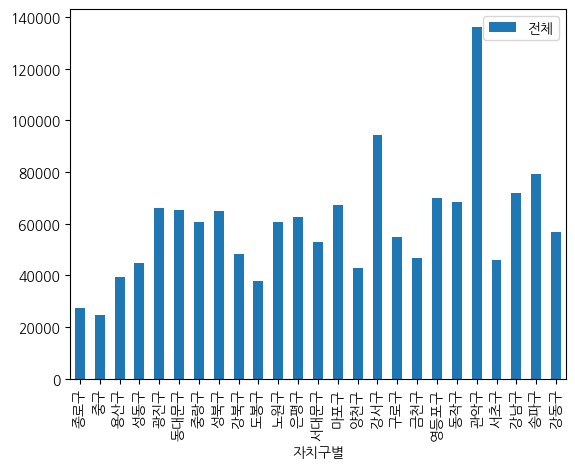

In [50]:
#자치구별 1인가구 수치

columns_to_plot = ['자치구별', '전체']
subset = house.loc[2:26, columns_to_plot]
subset.plot(x='자치구별', y='전체', kind='bar')

plt.show()

1인 가구 수 데이터 남자와 여자로 나눠서 살펴보기

In [51]:
#데이터 그룹화 해주기

grouped_data = house.groupby(['단독주택', '아파트','연립주택', '다세대주택',
                             '비거주용건물내주택', '주택이외거주'])
grouped_data = house.groupby(['단독주택_남','아파트_남','연립주택_남','다세대주택_남',
                             '비거주용건물내주택_남','주택이외거주_남'])
grouped_data = house.groupby(['단독주택_여','아파트_여','연립주택_여','다세대주택_여',
                             '비거주용건물내주택_여','주택이외거주_여'])

In [52]:
#결측치 확인 

missing_values = house.isnull().sum()
print(missing_values)

자치구별           0
전체             0
전체_남           0
전체_여           0
주택거주           0
주택거주_남         0
주택거주_여         0
단독주택           0
단독주택_남         0
단독주택_여         0
아파트            0
아파트_남          0
아파트_여          0
연립주택           0
연립주택_남         0
연립주택_여         0
다세대주택          0
다세대주택_남        0
다세대주택_여        0
비거주용건물내주택      0
비거주용건물내주택_남    0
비거주용건물내주택_여    0
주택이외거주         0
주택이외거주_남       0
주택이외거주_여       0
dtype: int64


In [53]:
#데이터 타입 변경

columns_to_change = ['단독주택', '아파트','연립주택', '다세대주택',
                     '비거주용건물내주택', '주택이외거주','단독주택_남',
                     '아파트_남','연립주택_남','다세대주택_남',
                     '비거주용건물내주택_남','주택이외거주_남', 
                     '단독주택_여','아파트_여','연립주택_여','다세대주택_여',
                     '비거주용건물내주택_여','주택이외거주_여']
house[columns_to_change] = house[columns_to_change].astype(float)


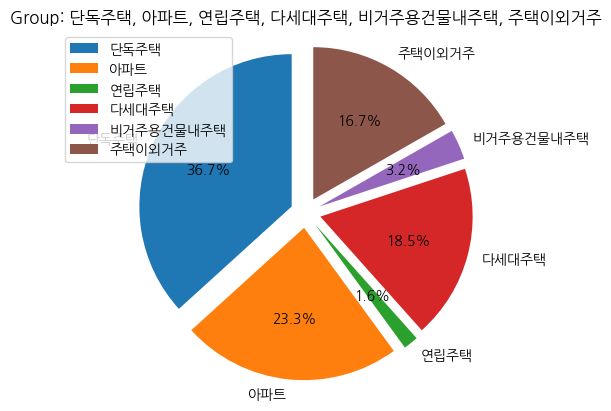

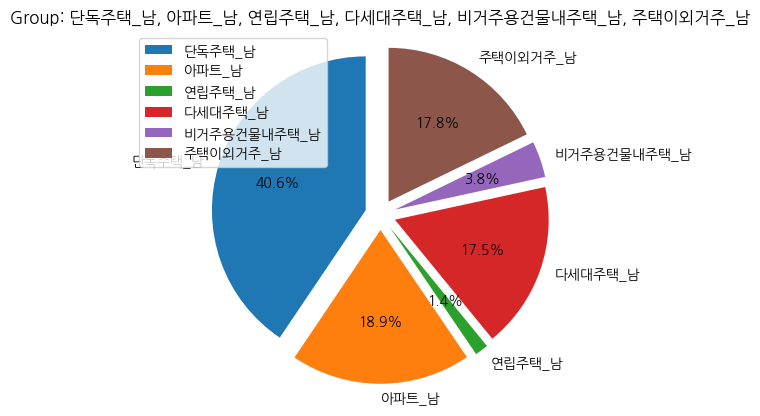

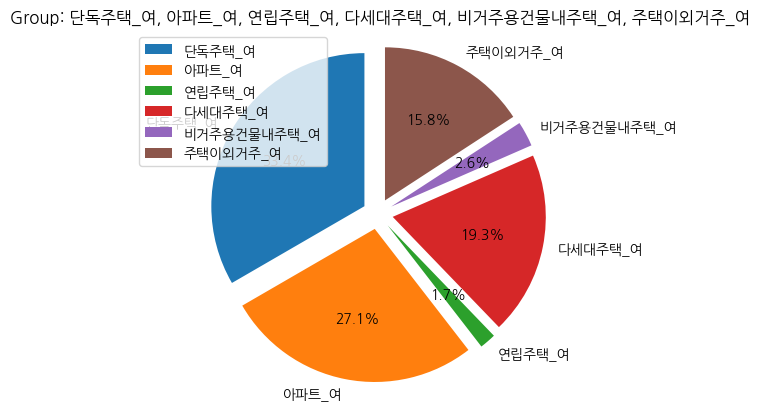

In [54]:
#그룹별 파이 모양 그래프 만들기
import matplotlib.pyplot as plt

groups = [
    ['단독주택', '아파트', '연립주택', '다세대주택', '비거주용건물내주택', '주택이외거주'],
    ['단독주택_남', '아파트_남', '연립주택_남', '다세대주택_남', '비거주용건물내주택_남', '주택이외거주_남'],
    ['단독주택_여', '아파트_여', '연립주택_여', '다세대주택_여', '비거주용건물내주택_여', '주택이외거주_여']
]

for group in groups:
    sizes = house[group].sum()  # 그룹별로 원형 그래프의 크기를 나타내는 값
    labels = group  # 그룹별로 원형 그래프의 라벨로 사용할 값
    explode = [0.1] * len(group)  # 각 부분을 분리하기 위한 값 (옵션)

    plt.pie(sizes, labels=labels, explode=explode, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')  # 원형 그래프를 원형으로 유지
    plt.title(f'Group: {", ".join(group)}')
    plt.legend()
    plt.show()


범죄 종류별로 현황 살펴보기

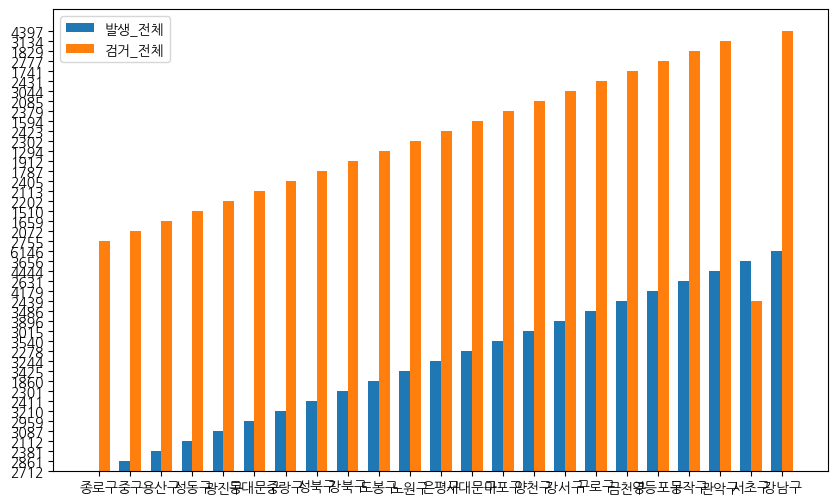

In [55]:
columns_to_plot = ['자치구별', '발생_전체', '검거_전체']
crime1 = crime.loc[2:26, columns_to_plot]
fig, ax = plt.subplots(figsize=(10, 6))

x_indices = np.arange(len(crime1['자치구별']))
bar_width = 0.35

ax.bar(x_indices - bar_width/2, crime1['발생_전체'], bar_width, label='발생_전체')
ax.bar(x_indices + bar_width/2, crime1['검거_전체'], bar_width, label='검거_전체')

ax.set_xticks(x_indices)
ax.set_xticklabels(crime1['자치구별'])
ax.legend()

plt.show()



자치구별 1인 가구의 수 데이터와 주요시설 데이터를 합쳐서 시각화 그래프 그리기

### 3. 데이터 분석

In [56]:
#자치구별 칼럼을 중심으로 두 데이터 합쳐주기

housef = house.merge(safe, on='자치구별')
housef.head()

,자치구별,전체,전체_남,전체_여,주택거주,주택거주_남,주택거주_여,단독주택,단독주택_남,단독주택_여,...,비거주용건물내주택,비거주용건물내주택_남,비거주용건물내주택_여,주택이외거주,주택이외거주_남,주택이외거주_여,경찰서,지구대파출소치안센터,소방서,119안전센터
0,종로구,27308.0,13211,14097,21465,10037,11428,11290.0,5661.0,5629.0,...,916.0,487.0,429.0,5843.0,3174.0,2669.0,2,22,1,6
1,중구,24544.0,11654,12890,18406,8370,10036,6762.0,3374.0,3388.0,...,745.0,419.0,326.0,6138.0,3284.0,2854.0,2,18,1,5
2,용산구,39270.0,18124,21146,33407,15090,18317,16778.0,8025.0,8753.0,...,662.0,389.0,273.0,5863.0,3034.0,2829.0,1,12,1,5
3,성동구,44946.0,22127,22819,39191,19121,20070,19282.0,10766.0,8516.0,...,1806.0,1024.0,782.0,5755.0,3006.0,2749.0,1,15,1,4
4,광진구,66140.0,31456,34684,57695,27549,30146,36204.0,18429.0,17775.0,...,2674.0,1475.0,1199.0,8445.0,3907.0,4538.0,1,12,1,3


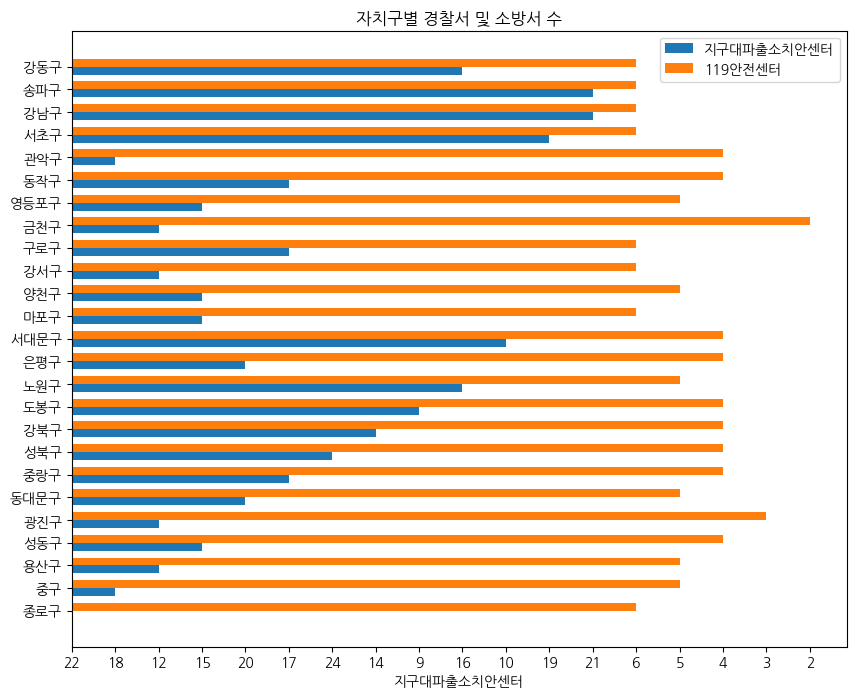

In [57]:
#자치구별 파출소와 소방서 갯수 그래프로 나타내주기

x_police = housef['지구대파출소치안센터']
x_fire_station = housef['119안전센터']
y = housef['자치구별']

fig, ax = plt.subplots(figsize=(10, 8))

bar_width = 0.35

x_indices = np.arange(len(y))

ax.barh(x_indices - bar_width/2, x_police, bar_width, label='지구대파출소치안센터')

ax.barh(x_indices + bar_width/2, x_fire_station, bar_width, label='119안전센터')

ax.set_yticks(x_indices)
ax.set_yticklabels(y)

ax.legend()

ax.set_title('자치구별 경찰서 및 소방서 수')
ax.set_xlabel('지구대파출소치안센터')

plt.show()

지역별 1인 가구수, 경찰서 수, 범죄 발생 수의 그래프를 그려서 어떤 상관관계가 있는지 확인

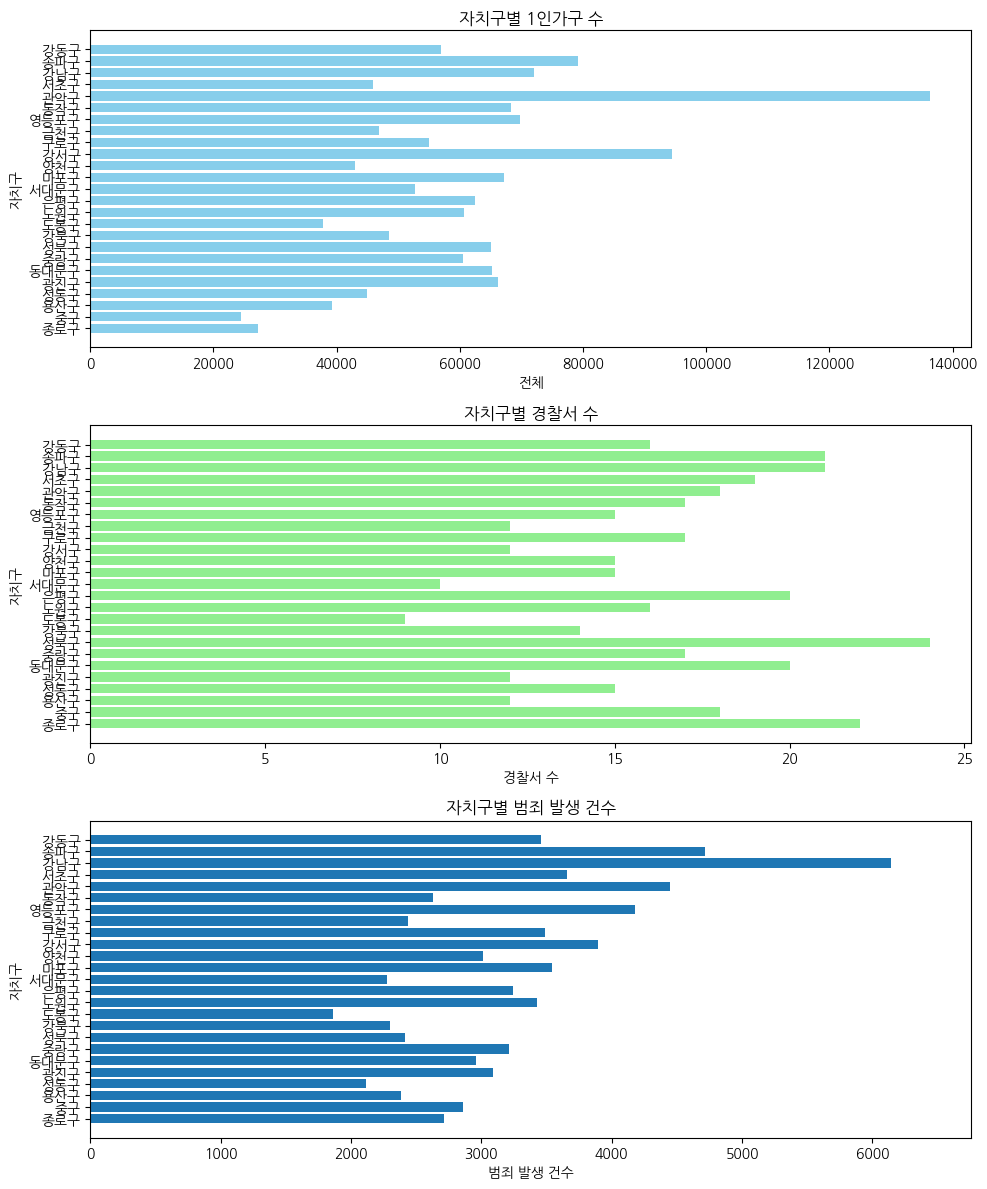

In [59]:
# 데이터 설정
x_single_household = housef['전체']
x_police = housef['지구대파출소치안센터']
crime_occurrences = crime.loc[crime['자치구별'].isin(y), '발생_전체']

# 문자열을 숫자형으로 변환
x_single_household = x_single_household.astype(int)
x_police = x_police.astype(int)
crime_occurrences = crime_occurrences.astype(float)

# 그래프 크기와 서브플롯 설정
fig, axs = plt.subplots(3, 1, figsize=(10, 12))

# 1인가구 수 그래프
axs[0].barh(y, x_single_household, color='skyblue')
axs[0].set_xlabel('전체')
axs[0].set_ylabel('자치구')
axs[0].set_title('자치구별 1인가구 수')

# 경찰서 수 그래프
axs[1].barh(y, x_police, color='lightgreen')
axs[1].set_xlabel('경찰서 수')
axs[1].set_ylabel('자치구')
axs[1].set_title('자치구별 경찰서 수')

# 범죄 발생 건수 그래프
axs[2].barh(y, crime_occurrences)
axs[2].set_title('자치구별 범죄 발생 건수')
axs[2].set_xlabel('범죄 발생 건수')
axs[2].set_ylabel('자치구')
axs[2].set_xlim([0, max(crime_occurrences) * 1.1])

plt.tight_layout()
plt.show()


### 4. 결론


2021년 기준 서울시에 1인 가구가 가장 많은 지역은 관악구이고 경찰서 수가 가장 많은 곳은 성북구이고 범죄가 가장 많이 발생한 곳은 강남구이다.
<br>1인 가구가 가장 많은 곳에 범죄가 많이 일어날 것이라고 예상한 것과는 다르게 강남구에 가장 많은 범죄가 일어났다.
<br>1인 가구의 수와는 다르게 대체로 강남구에 사람이 많이 몰려서 범죄도 많이 일어나는 것이라고 예상된다.

### 5. 한계점

일부 그래프를 시각화 할때 데이터의 값과 실제 시각화 그래프에 값이 다르게 나타나는 오류가 있었다.
<br>여러 방법으로 코드를 수정해보았으나 같은 결과가 나와서 해결할 수 없었다.

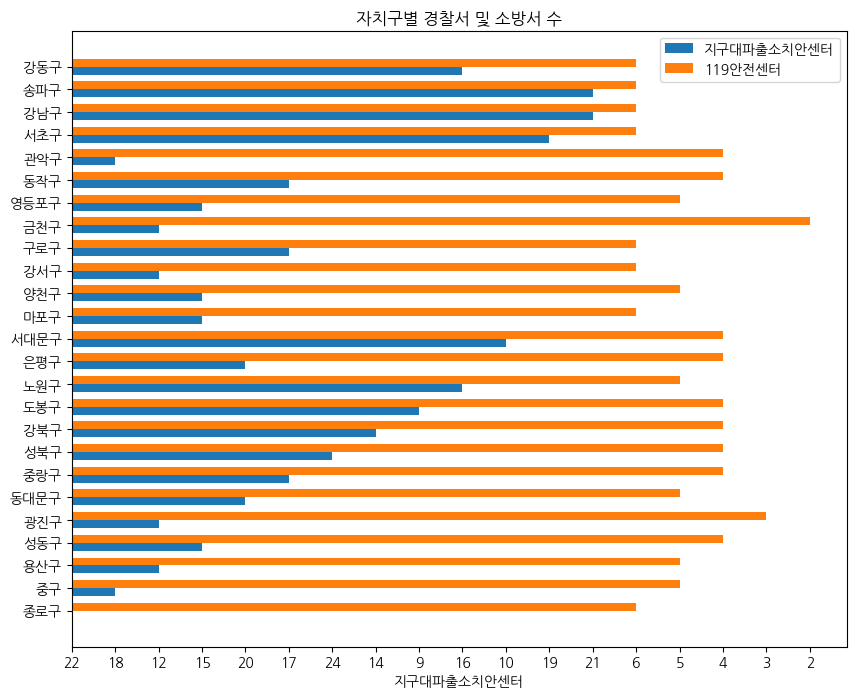

In [60]:
#자치구별 파출소와 소방서 그래프 오류

x_police = housef['지구대파출소치안센터']
x_fire_station = housef['119안전센터']
y = housef['자치구별']

fig, ax = plt.subplots(figsize=(10, 8))

bar_width = 0.35

x_indices = np.arange(len(y))

ax.barh(x_indices - bar_width/2, x_police, bar_width, label='지구대파출소치안센터')

ax.barh(x_indices + bar_width/2, x_fire_station, bar_width, label='119안전센터')

ax.set_yticks(x_indices)
ax.set_yticklabels(y)

ax.legend()

ax.set_title('자치구별 경찰서 및 소방서 수')
ax.set_xlabel('지구대파출소치안센터')

plt.show()

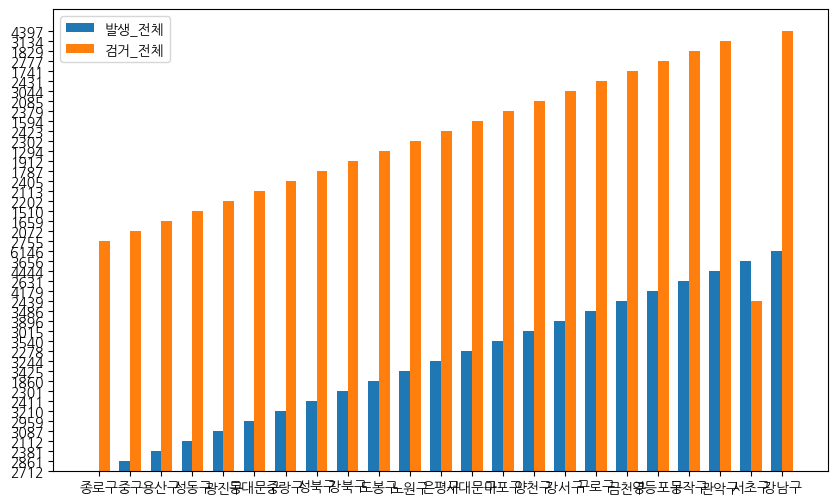

In [61]:
# 자치구별 범죄 발생, 검거 현황 그래프 오류

columns_to_plot = ['자치구별', '발생_전체', '검거_전체']
crime1 = crime.loc[2:26, columns_to_plot]
fig, ax = plt.subplots(figsize=(10, 6))

x_indices = np.arange(len(crime1['자치구별']))
bar_width = 0.35

ax.bar(x_indices - bar_width/2, crime1['발생_전체'], bar_width, label='발생_전체')
ax.bar(x_indices + bar_width/2, crime1['검거_전체'], bar_width, label='검거_전체')

ax.set_xticks(x_indices)
ax.set_xticklabels(crime1['자치구별'])
ax.legend()

plt.show()